<a href="https://colab.research.google.com/github/hseyeon1006/ESAA_YB/blob/main/%EB%AF%B8%EB%8B%88_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B81_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미니 프로젝트 (1)
- 관련 사이트: https://dacon.io/competitions/open/235536/data

- 과제: 지금까지 배운 pandas 코드를 통해 유의미한 결과 5개 이상 출력하고, 그래프 그리기 (데이터 전처리는 예시 참고)

  조건: 변수 2개 이상 연결한 결과값 포함

* 위의 주소에서 데이터를 다운받은 후, 사이트의 내용을 참고하여 새로 알고자 하는 내용으로 데이터를 분석하시면 됩니다. 분석은 train.csv 파일만을 이용하시면 됩니다.

* 분석 파일을 github에 업로드 후 링크를 과제함에 댓글로 달아주시면 됩니다.

* 데이터 전처리 및 분석 예시는 카페에 업로드 되어 있으니 참고 바랍니다.

* 제출기한: 2022.04.08 (금) 23:59

# **1. 라이브러리 및 데이터**


In [1]:
# matplotlib 한글 깨짐방지
# 아래코드 실행후 '런타임 다시시작' 후 모듈 불러오기
# 참고 블로그: https://teddylee777.github.io/colab/colab-korean 
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (9,471 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128288 files and di

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [3]:
# 데이터 불러오기
train=pd.read_csv("/content/mydrive/MyDrive/Colab_Notebooks/학회/데이터/movies_train.csv")

# **2. 탐색적 자료분석(EDA)**



## 1) 일부 데이터 미리보기


+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [4]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [5]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


## 2) 데이터 요약


In [6]:
print(train.shape)

(600, 12)


- 600개의 데이터로 학습 시키고 243개의 영화의 관객수를 예측해야 한다. test에는 12개의 열이 있고 test에는 관객수(box_off_num)를 제외한 11개의 열이 존재한다.


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


## 3) 데이터의 요약통계량 확인

In [8]:
pd.options.display.float_format = '{:.1f}'.format

In [9]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


## 4) 결측치 확인 및 데이터 전처리


In [10]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

- train과 test 모두 dir_prev_bfnum 변수에 결측값이 존재한다.

In [11]:
# 결측값의 특성 확인
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


In [12]:
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())

0


- train과  test 모두 dir_prev_bfnum이 결측값으로 존재하는 데이터들은 전부 dir_prev_num이 0인 영화들이다. 즉, 감독의 이전작품이 존재 하지 않은 경우이다. 따라서 dir_prev_bfnum에 있는 결측값은 전부 0으로 채운다.

In [13]:
train['dir_prev_bfnum'].fillna(0, inplace=True)

- release_time은 시간에 관련된 데이터인데 int형으로 인식되고 있다. release_time을 datetime형식으로 변환한다.

In [14]:
train['release_time']=pd.to_datetime(train['release_time'])

## 5) 데이터 시각화 및 분석

### 5-1) 감독의 이전 영화 평균 관객 수와 현 영화 관객 수의 상관관계


영화 감독이 관객 수에 미치는 영향 파악

In [20]:
df = train.groupby('director')['dir_prev_bfnum','dir_prev_num','box_off_num'].sum() 
df = df[df['dir_prev_num'] != 0]  
df

,dir_prev_bfnum,dir_prev_num,box_off_num
director,,,
강우석,844821.0,3,5094896
강형철,16061870.5,3,11469079
강효진,37518.0,1,1214237
경순,10393.5,2,2119
계윤식,1468191.0,1,101698
...,...,...,...
홍원찬,2888383.5,4,441208
홍지영,661220.5,2,1214839
황동혁,2781990.5,2,8659725


In [29]:
df.corr()

,dir_prev_bfnum,dir_prev_num,box_off_num
dir_prev_bfnum,1.0,0.3,0.4
dir_prev_num,0.3,1.0,0.4
box_off_num,0.4,0.4,1.0


dir_prev_bfnum과 box_off_num의 상관관계가 0.4 수준으로 낮은 편이다.

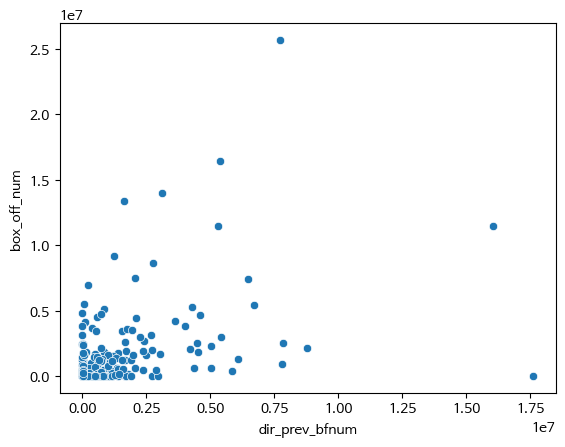

In [32]:
sns.scatterplot(x='dir_prev_bfnum',y='box_off_num',data=df)
plt.show()

산점도를 그려봤을 때, 데이터 값의 상당수가 0에 가깝다.

결론 : 감독의 이전 영화 관객 수와 현재 영화 관객 수 사이에 뚜렷한 상관관계가 있다고 보기 어렵다.

### 5-2) 상영시간과 관객 수 간의 상관관계

영화 상영시간이 너무 길거나 짧은 경우 영화의 선호도가 떨어지는지 확인. + 어느 상영 시간이 가장 선호도가 높은지 확인

In [33]:
df1 = train[['time','box_off_num']]
df1.corr()

,time,box_off_num
time,1.0,0.4
box_off_num,0.4,1.0


상영시간과 관객 수 간의 상관관계는 0.4 수준으로 낮은 편이다.

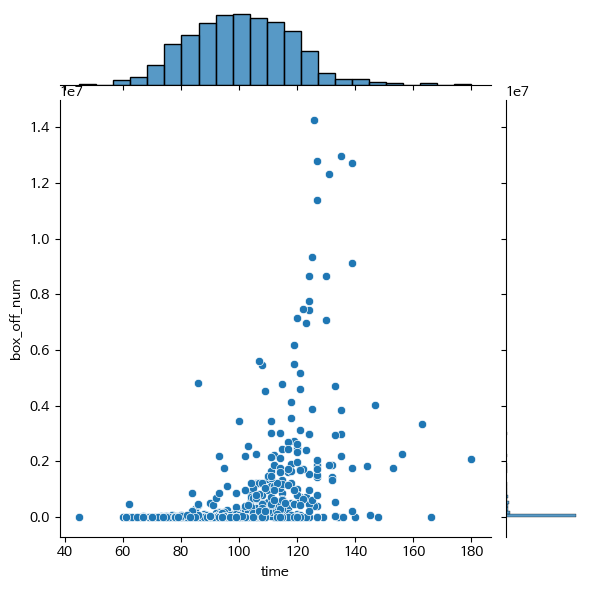

In [34]:
sns.jointplot(x='time',y='box_off_num',data=train)
plt.show()

* 히스토그램을 통해 상영시간이 80~120분 사이일 경우 관객 수가 많다는 것을 확인할 수 있다.
* 산점도를 통해 대부분의 영화가 비슷한 관객 수를 갖지만, 특이한 값을 보이는 (유난히 높은 관객 수를 가진) 영화의 상영시간이 120분~140분 사이임을 알 수 있다.

### 5-3) 영화 개봉 연도에 따른 평균 관객수

시간이 지남에 따라 영화를 보는 총 관객수가 줄어드는지 등을 확인하기 위해

In [35]:
train['release_year']=train['release_time'].dt.year

In [36]:
train[['release_year','box_off_num']].groupby('release_year').mean().sort_values('box_off_num', ascending=False)

,box_off_num
release_year,
2013,1007357.8
2012,945725.2
2011,628867.1
2015,595869.2
2014,593884.5
2010,541658.2


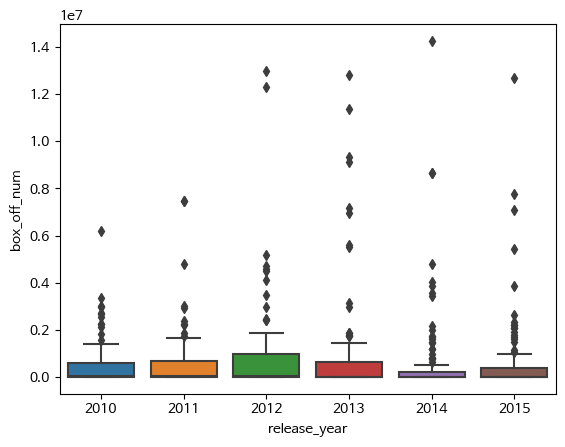

In [38]:
baxplot=plt.subplots()
boxplot=sns.boxplot(x='release_year', y='box_off_num', data=train)

*  특정한 원인에 의해 시간이 흐름에 따라 영화를 보는 관객 수의 변화가 있을 것이라 예상했지만, 뚜렷한 변화를 확인하기는 힘들다.

###5-4) 계절에 따른 관객 수

In [44]:
train['release_month'] = train['release_time'].dt.month

In [47]:
def season(x):
  if ((x>=3) & (x<=5)):
    return 'spring'
  elif ((x>=6) & (x<=8)):
    return 'summer'
  elif ((x>=9) & (x<=11)):
    return 'fall'
  else:
    return 'winter'

train['release_season'] = train['release_month'].apply(season)
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_month,release_season
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398,2012,11,fall
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501,2015,11,fall
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083,2013,6,summer
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866,2012,7,summer
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387,2010,11,fall


In [60]:
train[['release_season','box_off_num']].groupby('release_season').mean().sort_values('box_off_num', ascending=False)

,box_off_num
release_season,
winter,1150833.7
summer,947644.8
fall,535068.0
spring,379423.3


<Axes: xlabel='release_season', ylabel='box_off_num'>

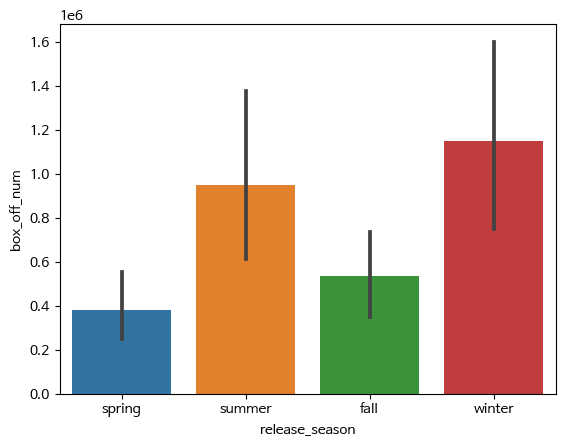

In [66]:
sns.barplot(x='release_season', y='box_off_num', data=train,
                order = ['spring', 'summer','fall','winter'])

봄, 가을보다 여름, 겨울에 개봉하는 영화의 관객 수가 더 많다.

### 5-4) 상영 등급에 따른 영화 수

어떤 상영 등급의 영화가 많이 만들어지는지?

In [39]:
train['screening_rat'].value_counts()

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

<Axes: >

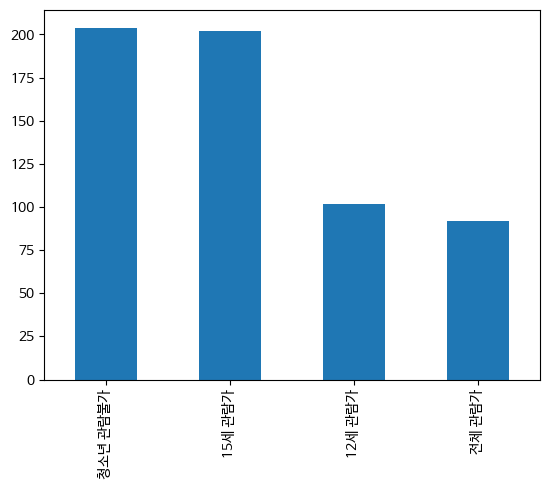

In [41]:
train['screening_rat'].value_counts().plot(kind='bar')

청소년 관람불가, 15세 관람가 영화 수가 12세 관람과, 전체 관람가 영화 수의 두 배이다.

###5-5) 상영등급 별 관객 수

상영등급 별 관객의 수는 어떤지?

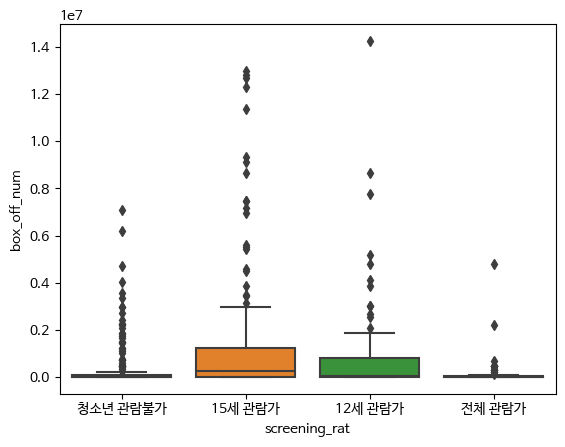

In [43]:
ax=plt.subplots()
ax=sns.boxplot(x='screening_rat',y='box_off_num',data=train,
               order = ['청소년 관람불가','15세 관람가','12세 관람가','전체 관람가'])